<a href="https://colab.research.google.com/github/Jayyddoo/Spotify-data-Analysis-and-Machine-learning/blob/main/Danceability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![dance party](dance_party.jpg)



# 📖 Background
---
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.


# Objective ☝
---
Our objective is to construct and implement a machine learning model for forecasting a song's danceability, drawing insights from our data briefing. Danceability hinges on various elements, including tempo, rhythm stability, beat strength, and regularity. Given that not all of these factors are present in our dataset, our approach involves a thorough analysis and visualization. These efforts aim to identify the dataset variables that closely align with the characteristics relevant to danceability. By doing so, we intend to bridge the gap between available data and the comprehensive understanding needed to make accurate danceability predictions through our machine learning model.
This explory data analysis is carried out to find which variables best fit as factors of danceability.

# 📚 Imports
---

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')



<ipython-input-1-b2c759d0ab90>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# 💾 The Data
---

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` |  .|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.|
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.|
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.|
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

<a id='1'></a>
# 💿 Load and Display Data
---

In [ ]:
spotify_data = pd.read_csv('dataset.csv')

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66016 non-null  int64  
 1   track_id          66016 non-null  object 
 2   artists           66014 non-null  object 
 3   album_name        66014 non-null  object 
 4   track_name        66014 non-null  object 
 5   popularity        66015 non-null  float64
 6   duration_ms       66015 non-null  float64
 7   explicit          66015 non-null  object 
 8   danceability      66015 non-null  float64
 9   energy            66015 non-null  float64
 10  key               66015 non-null  float64
 11  loudness          66015 non-null  float64
 12  mode              66015 non-null  float64
 13  speechiness       66015 non-null  float64
 14  acousticness      66015 non-null  float64
 15  instrumentalness  66015 non-null  float64
 16  liveness          66015 non-null  float6

In [ ]:
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [ ]:
spotify_data.columns #Unamed looks irrelevant so we will have to drop it

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
spotify_data.shape

(66016, 21)

In [ ]:
spotify_data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,66016.000000,66015.000000,6.601500e+04,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000,66015.000000
mean,33007.500000,32.643914,2.303266e+05,0.562975,0.660006,5.321684,-8.001458,0.632705,0.092471,0.285441,0.172520,0.207671,0.457048,123.013904,3.914080
std,19057.322022,22.352270,1.142149e+05,0.173459,0.250723,3.560072,4.899575,0.482072,0.123150,0.325910,0.319263,0.180033,0.253599,29.465511,0.411875
min,0.000000,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,16503.750000,16.000000,1.745695e+05,0.451000,0.493000,2.000000,-9.754000,0.000000,0.036300,0.009490,0.000000,0.097200,0.247000,100.026000,4.000000
50%,33007.500000,32.000000,2.140870e+05,0.574000,0.708000,5.000000,-6.739000,1.000000,0.050500,0.125000,0.000102,0.131000,0.441000,122.969000,4.000000
75%,49511.250000,50.000000,2.654260e+05,0.691000,0.873000,8.000000,-4.816000,1.000000,0.090900,0.538000,0.114000,0.270000,0.657000,141.025000,4.000000
max,66015.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.999000,0.995000,0.995000,243.372000,5.000000


#

# 🧽 Clean the Dataset
---


In [ ]:
#drop Unamed: 0
spotify_data.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
spotify_data.shape

(66016, 20)

👍 Column dropped

In [ ]:
#check for null values
spotify_data.isnull().sum()
#null values present

track_id            0
artists             2
album_name          2
track_name          2
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [ ]:
spotify_data.dropna(inplace=True)

In [ ]:
spotify_data.shape #check if values have been dropped

(66014, 20)

👍 Null values dropped

In [ ]:
# check for unique values in the dataset
spotify_data['track_id'].nunique()

55909

Dataset contains 113,999 rows after dropping null values but there are only 89,740 unique track IDs, which means that there are approximately 24,259 duplicate values present.From further study of the dataset there are 16,642 distinct songs that appear multiple times in the dataset.
These duplicated values or items are deleted in order to proceed with analysis

In [ ]:
spotify = spotify_data[spotify_data['track_id'].duplicated(keep = False)]

In [ ]:
spotify.shape

(17936, 20)

👍 Duplicates removed

# 🔍 Exploratory Data Analysis
---

## 📊 Visualization
---

Our objective is to construct and implement a machine learning model for forecasting a song's danceability, drawing insights from our data briefing. Danceability hinges on various elements, including tempo, rhythm stability, beat strength, and regularity. Given that not all of these factors are present in our dataset, our approach involves a thorough analysis and visualization. These efforts aim to identify the dataset variables that closely align with the characteristics relevant to danceability. By doing so, we intend to bridge the gap between available data and the comprehensive understanding needed to make accurate danceability predictions through our machine learning model.
This explory data analysis is carried out to find which variables best fit as factors of danceability.

lets have a glimpse of the most popular songs in the dataset

### Popularity 💯

### Top 10 Popular tracks

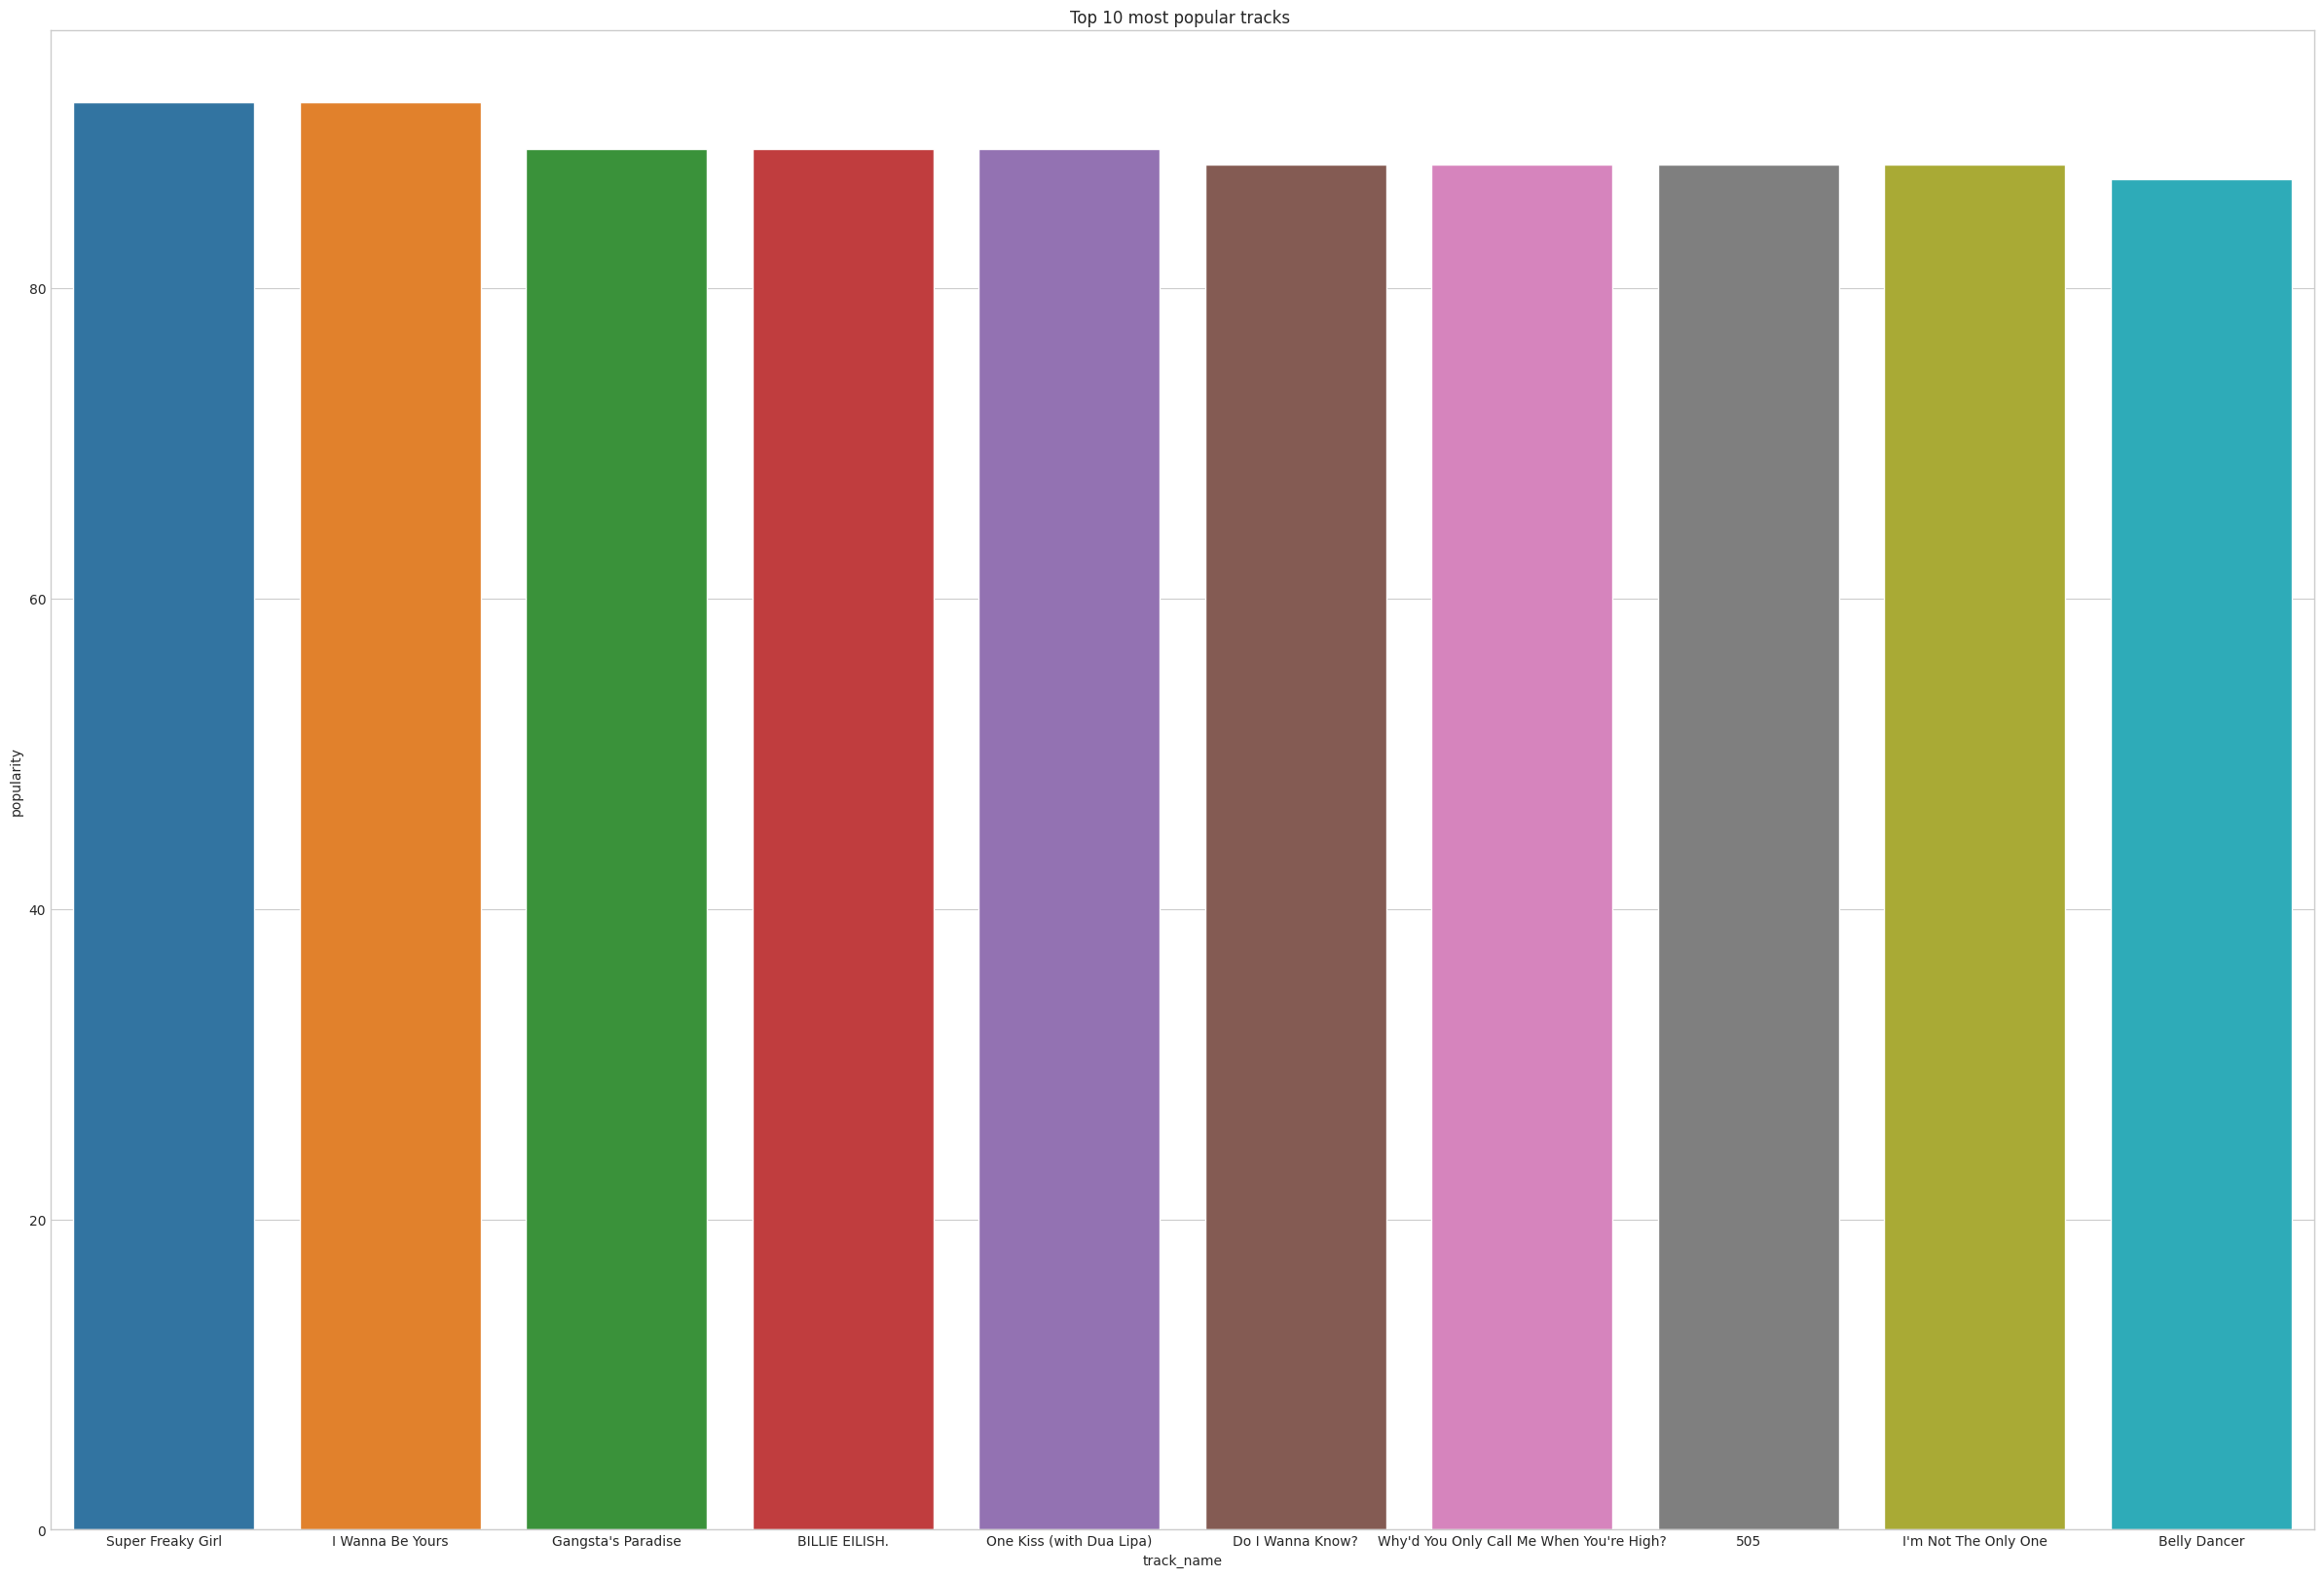

In [ ]:
sns.set_style("whitegrid")
grouped = spotify.groupby('track_name')['popularity'].mean()
plt.figure(figsize = (30,20), dpi = 100)
sns.barplot(x=grouped.sort_values(ascending = False)[0:10].index, y=grouped.sort_values(ascending = False)[0:10], orient='vertical' )
plt.xlabel('track_name')
plt.ylabel('popularity')
plt.title('Top 10 most popular tracks ')
plt.show()

Here are the top 10 tracks ranked by popularity, "Unholy" claims the leading position in the dataset with an impressive popularity rating of 100. These songs will serve as key reference points during the model training process.

---

We start by taking a look at the main course....🍝

### Danceability 💃  
---

Daceability ranges between 0.0 to 1.0

Lets check the distrubution of danceability across the dataset

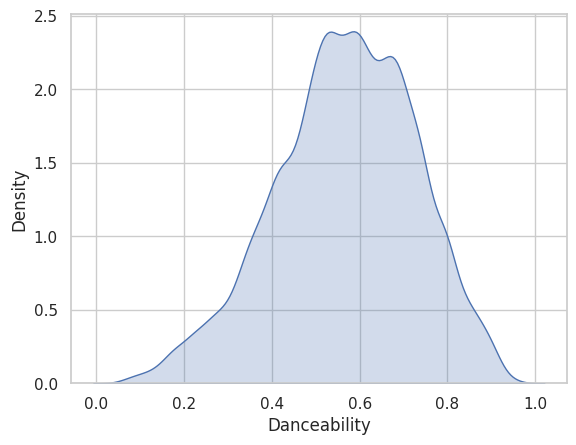

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['danceability'], fill=True,)  # Create the KDE plot
plt.xlabel("Danceability")  # Set X-axis label
# plt.ylabel("Density")  # Set Y-axis label
# plt.title("Kernel Density Plot")  # Set plot title
plt.show()  # Display the plot

The plot above illustrates that the predominant danceability rating among songs in the dataset is 0.6. This is further supported by the wide distribution depicted in the histogram plot of danceability scores. Considering both the central tendency around 0.6 and the broad range of danceability values, it is evident that the dataset contains a substantial number of songs classified as highly danceable.

### What are the Top 10 tracks based on danceability ❓

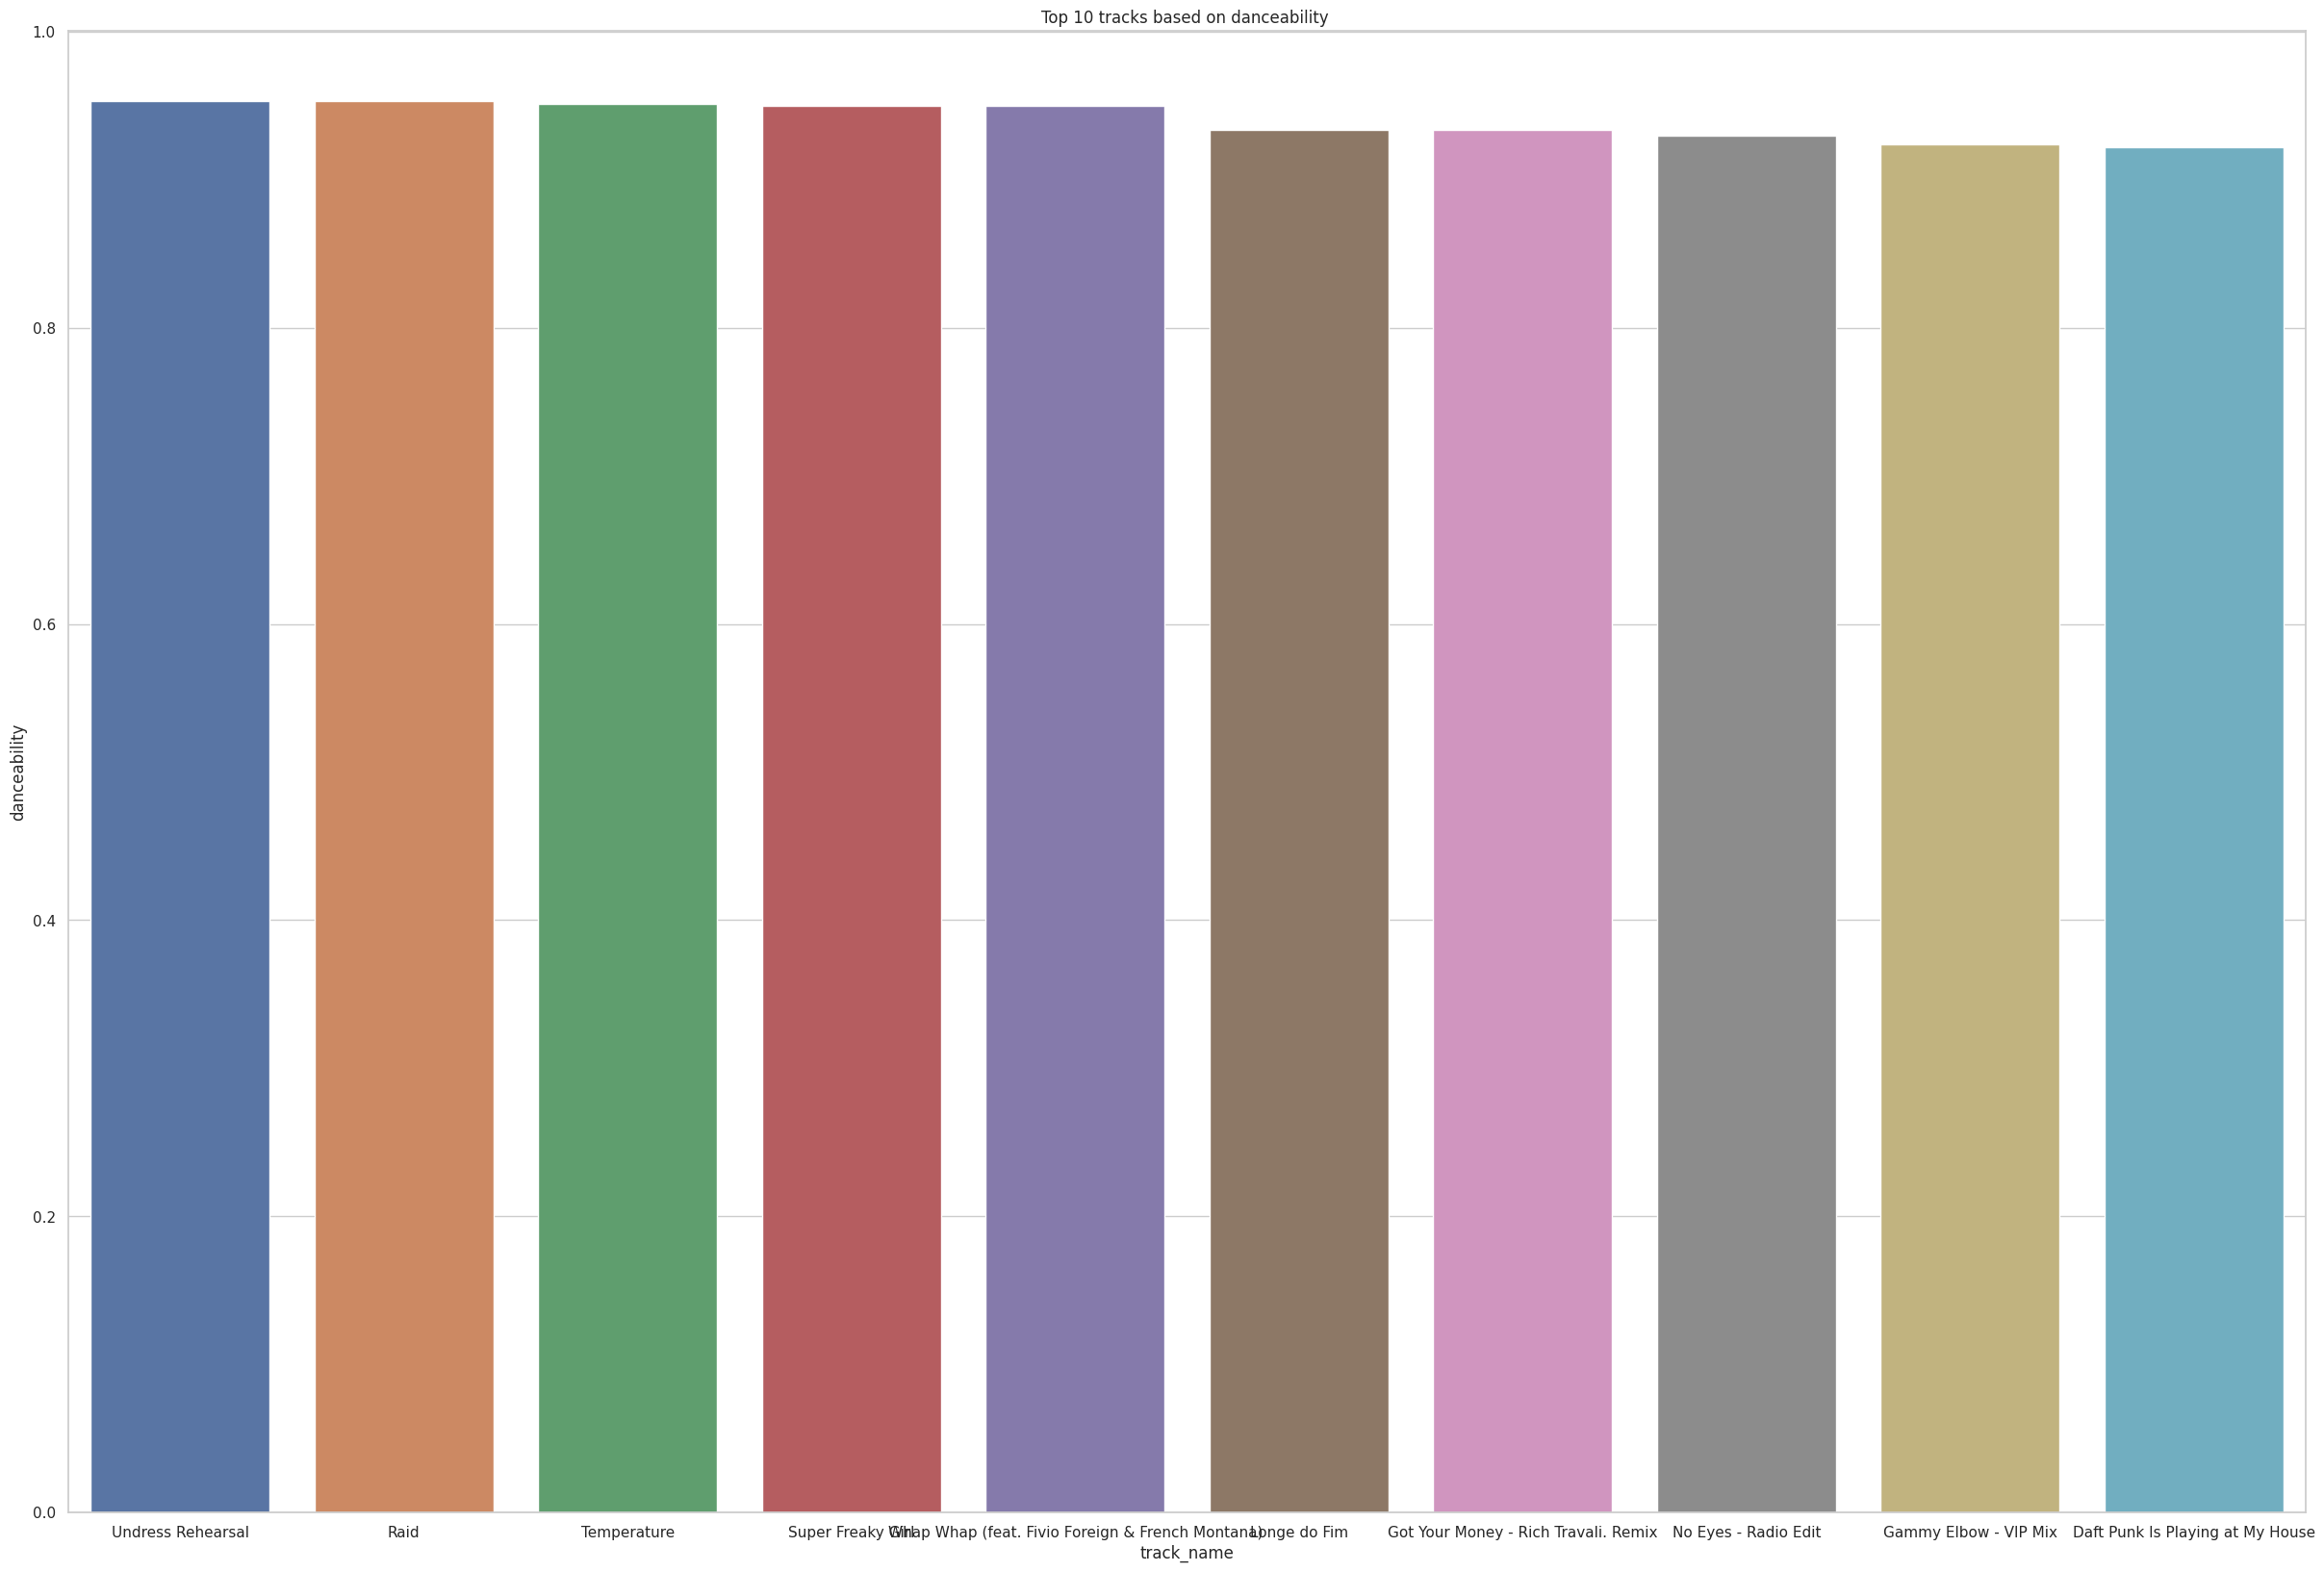

In [ ]:
sns.set_style("whitegrid")
grouped = spotify.groupby('track_name')['danceability'].mean()
plt.figure(figsize = (30,20), dpi = 100)
sns.barplot(x=grouped.sort_values(ascending = False)[0:10].index, y=grouped.sort_values(ascending = False)[0:10], orient='vertical' )
plt.xlabel('track_name')
plt.ylabel('danceability')
plt.title('Top 10 tracks based on danceability ')
plt.show()

**from the above we can see that Top 10 most danceable have very little or no difference**

### Begs the question why so little difference between each song ❓
Considering the factors which play a role in the danceability of a song
given that some prove absent here are the chosen factors suspected

Based on thesis
the factors that could play roles in the danceability of a song would be its
* Tempo
* energy
* loudness
* instrumentalness
* acousticness
* valence

<font color='red'>
    
<a id='6'></a>
**Note** Based on thesis

## Lets cook 👨‍🍳
---

### We  take look at loudness 🔊🔍

### Loudness 🔊

Overall loudness measured in decibels (db) Lets see its distrubution using a KDE plot

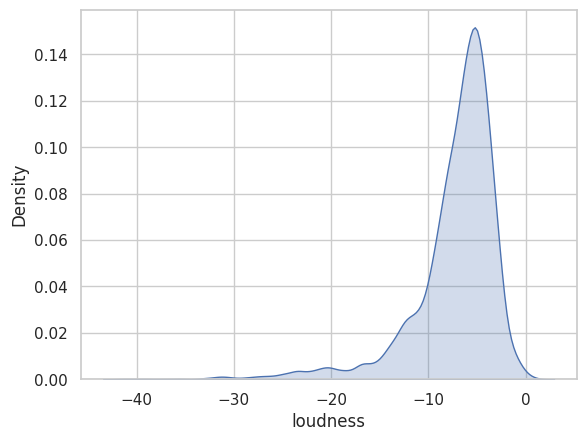

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['loudness'], fill=True,)  # Create the KDE plot
plt.xlabel("loudness")  # Set X-axis label

plt.show()  # Display the plot

The plotted data reveals a predominant concentration of track loudness ratings within the range of -30 to 0 dB. Notably, the most frequently occurring values, known as the mode, are clustered between -10 and 0 dB. It's essential to emphasize that loudness is a metric measured in decibels (dB), reflecting the intensity or volume of sound. This observation suggests that a significant proportion exhibit loudness levels within this particular decibel range, which could have implications for audio quality and listener experience.

## Quick question... What is the loudest track in the dataset then ❓

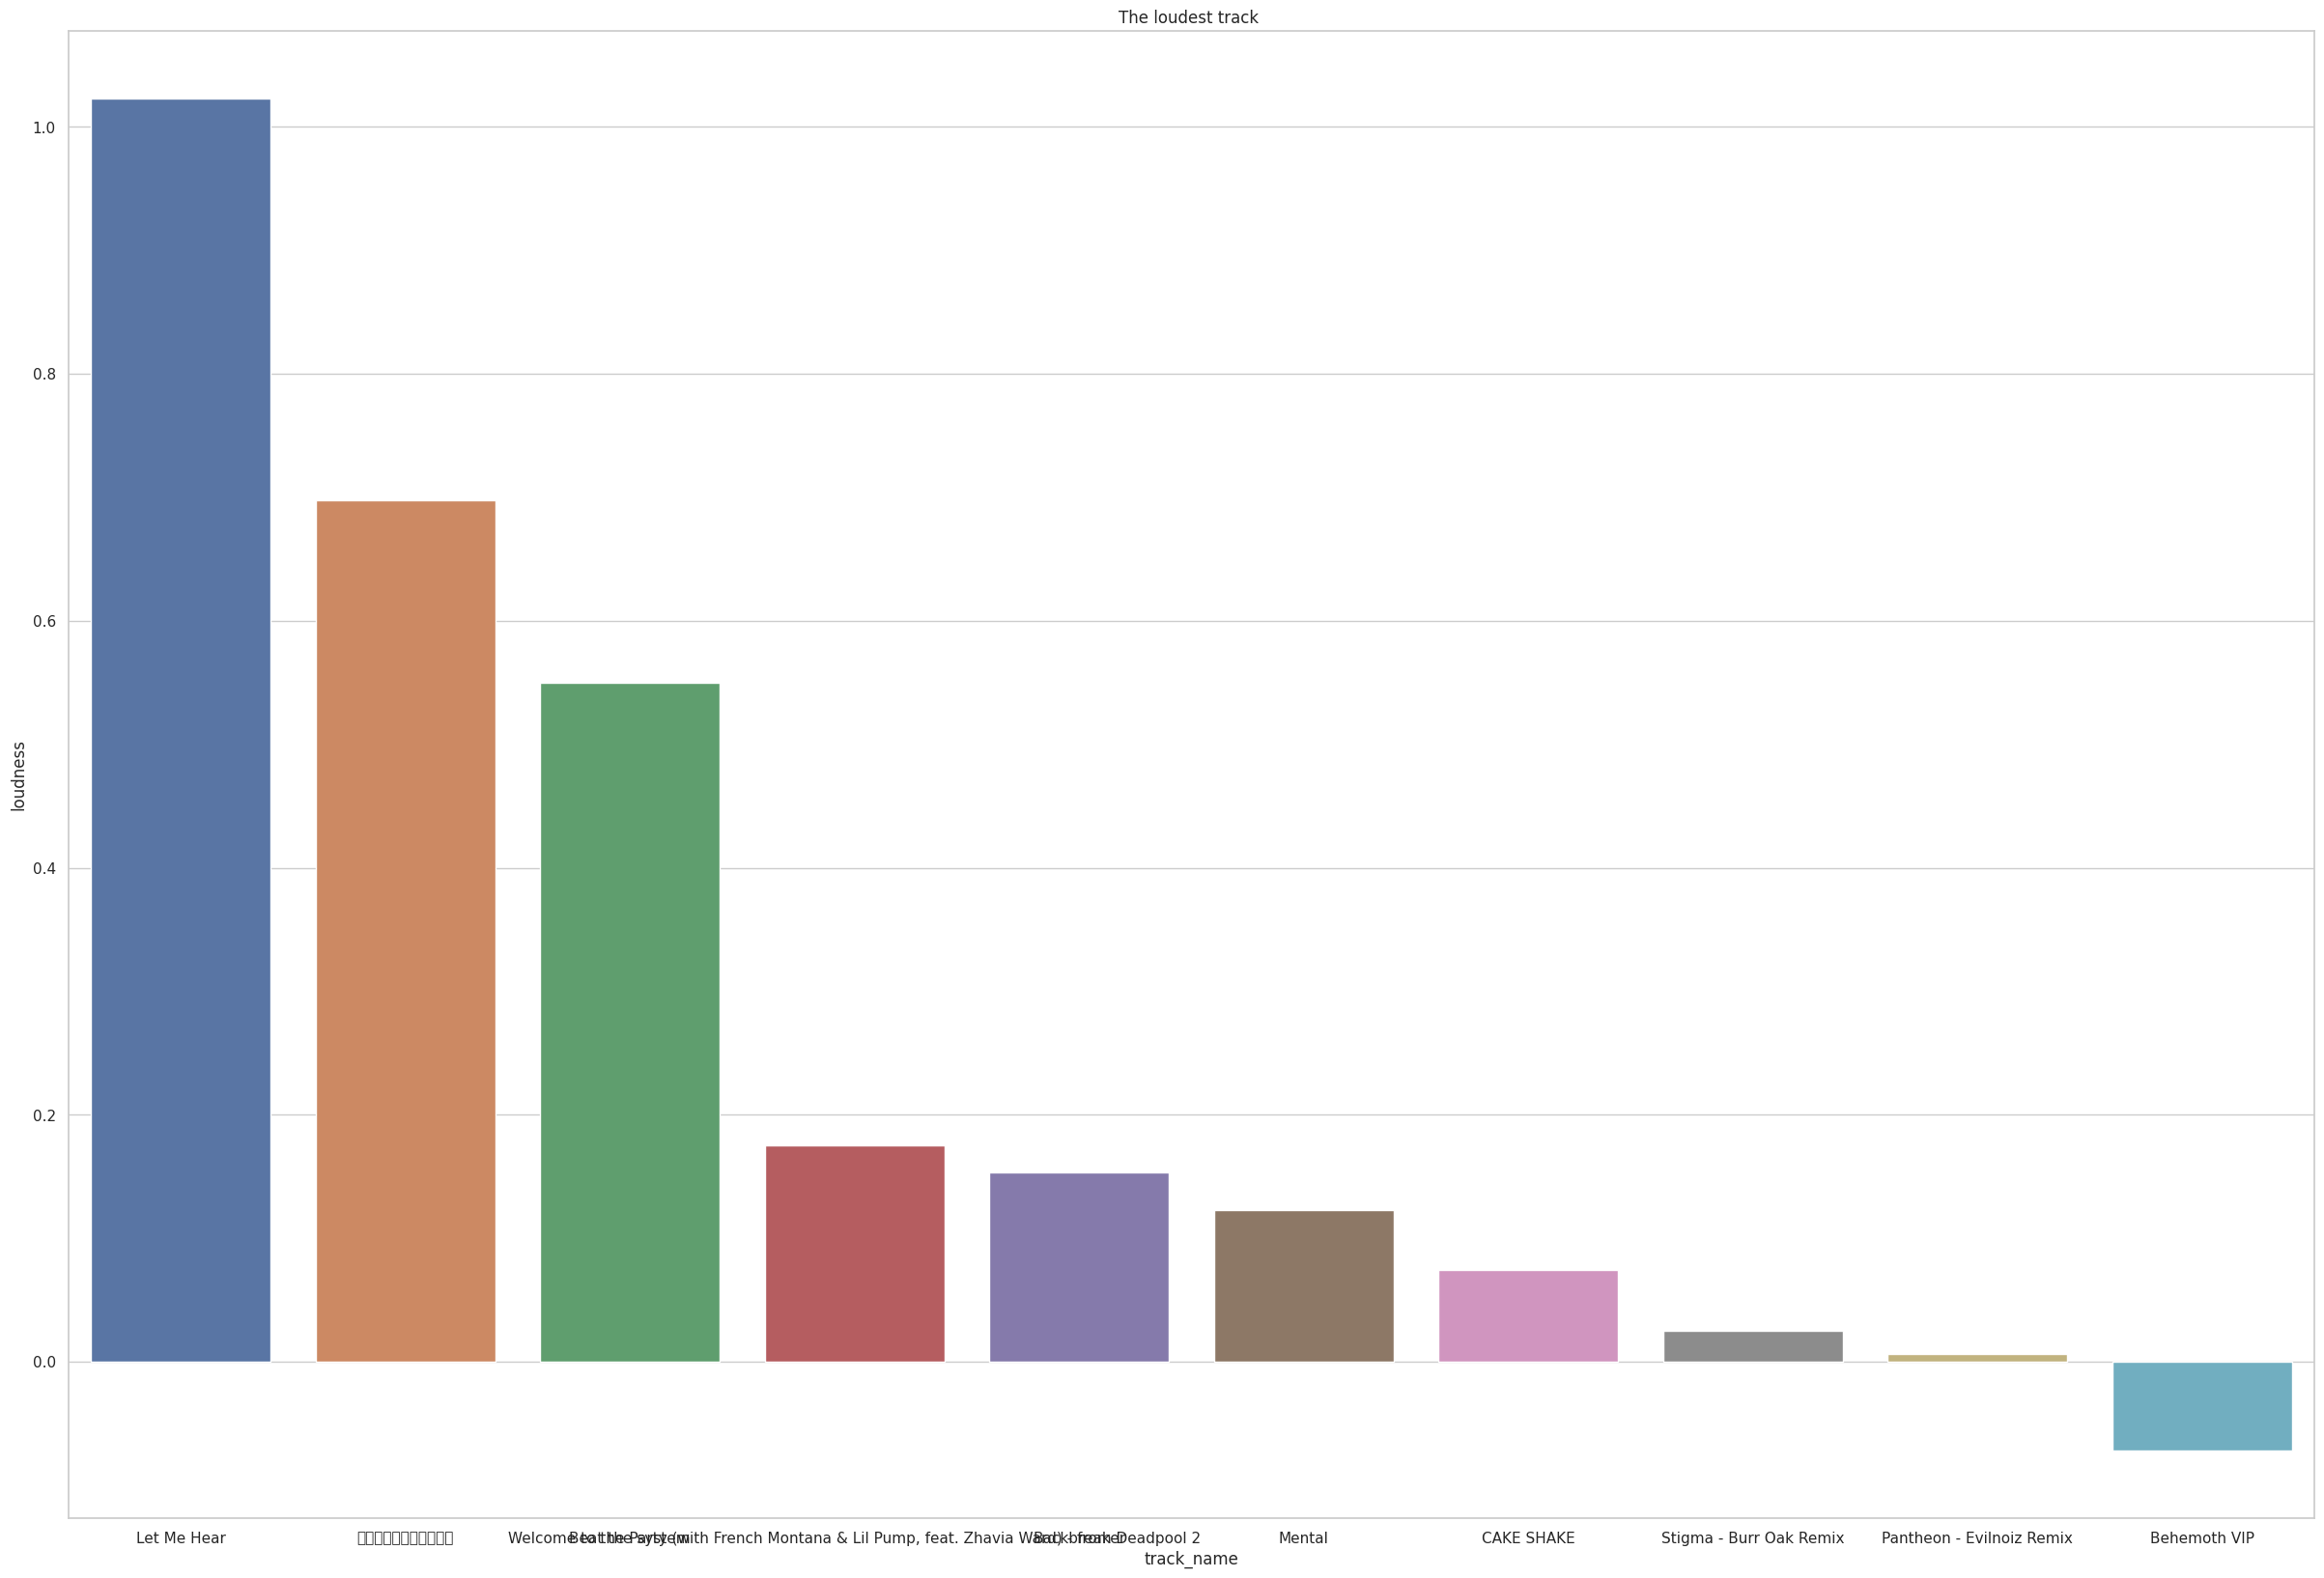

In [ ]:
sns.set_style("whitegrid")
grouped = spotify.groupby('track_name')['loudness'].mean()
plt.figure(figsize = (30,20), dpi = 100)
sns.barplot(x=grouped.sort_values(ascending = False)[0:10].index, y=grouped.sort_values(ascending = False)[0:10] )
plt.xlabel('track_name')
plt.ylabel('loudness')
plt.title('The loudest track ')
plt.show()

### 💡Come to think of it if LOUDNESS refers to how loud or soft a song sounds when you listen to it. Based on thesis a song being loud or soft could also be stirred up by the ENERGY level of the song just as in devices.

### Let's have a look at what the data says

### Energy ⚡

Energy indicates the track intensity and activity level.❗

Lets check the distribution across the dataset

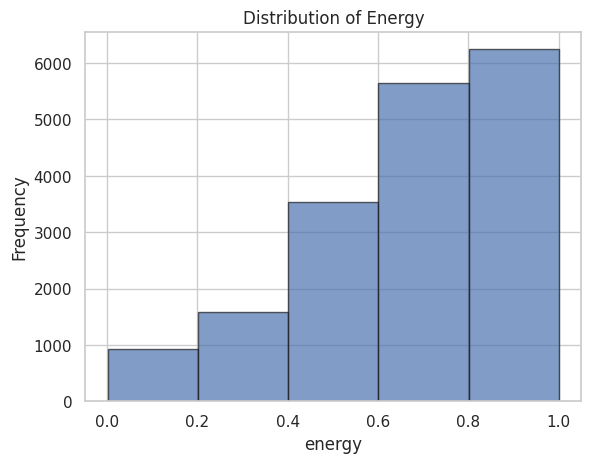

In [ ]:
plt.hist(spotify['energy'], bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(True)
plt.show()

Hmmmmm 💭... The histogram plot shows energy being left skewed

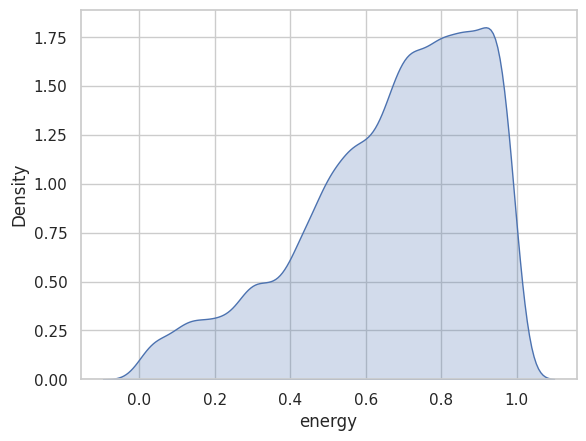

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['energy'], fill=True,)  # Create the KDE plot
plt.xlabel("energy")  # Set X-axis label
plt.show()  # Display the plot

The dataset's energy distribution, as depicted in the histogram plot, exhibits a left-skewed or negatively skewed pattern. The mode, representing the most frequently occurring energy levels, is prominently concentrated within the 0.8 to 1.0 range. This observation suggests that the majority of songs in the dataset possess energy values falling within this specific interval. In practical terms, this could imply that songs with higher energy levels in this range are more prevalent within the dataset.

**Lets see if energy plays a role in the danceability of a song inorder to do this we plot a scatterplot inorder to show the relationship**

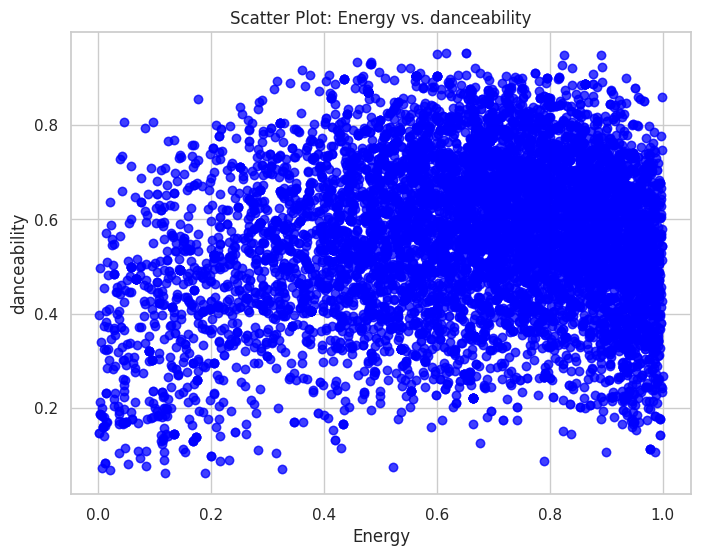

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(spotify['energy'], spotify['danceability'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('danceability')
plt.title('Scatter Plot: Energy vs. danceability')

# Show the plot
plt.grid(True)  # Add a grid (optional)
plt.show()

Examining the scatter plot provided above, it becomes evident that energy has a discernible impact on danceability, as illustrated by the relationship between these two variables. Each data point, representing a specific musical entity, is plotted based on danceability along the vertical (y-axis) and energy along the horizontal (x-axis). This graphical representation allows us to visually discern patterns and trends. The positioning of data points relative to the axes indicates how changes in energy levels correspond to variations in danceability, shedding light on the correlation or influence between these musical attributes.

## From here we can have a look at Tempo 🎤🎶

## why...❓ 🚨


**Tempo refers to its speed or the rate at which the musical beats occur. It is typically measured in beats per minute (BPM). This thesis is based on physics as energy is usually accompanied by speed which we will dive into now 🥽🌊**

### Tempo 🎤🎶

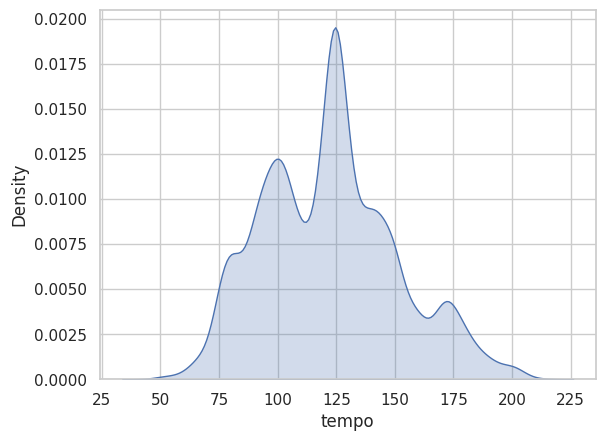

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['tempo'], fill=True,)  # Create the KDE plot
plt.xlabel("tempo")  # Set X-axis label
plt.show()  # Display the plot

From the above we can see that the shape of the plot 'Tempo'  is bimodal and non symmetric
Having its mode at 125BPM.
Judging from research dance music encompasses various subgenres, each with its own characteristic BPM range.
1) House Music: Typically ranges from 120 to 130 BPM, but it can vary.

2) Techno: Commonly falls in the range of 125 to 140 BPM.

3) Trance: Often features BPM between 130 and 160, with some trance tracks going faster.

4) Hip-Hop/Rap: Hip-hop songs can vary widely in BPM, but many have BPM in the range of 70 to 100.

5) Electronic Dance Music (EDM): The BPM in EDM can vary greatly, but it often falls in the range of 120 to 150 BPM, depending on the subgenre (e.g., dubstep, drum and bass, trap).

6)  Disco: Classic disco songs typically have BPM around 120.

7) Dubstep: Often falls in the range of 140 to 160 BPM.

8) Reggaeton: Typically around 80 to 100 BPM.

9) Salsa: Salsa music usually has BPM in the range of 150 to 250 BPM.

On the long run it becomes evident that a notable portion of the songs within the dataset leans towards being danceable, as indicated by a predominant BPM (beats per minute) mode of 125. This observation suggests that the most common tempo for these songs aligns with the rhythmic characteristics conducive to dance music. The dataset's distribution of BPM values highlights a peak around 125, indicating a concentration of tracks within this tempo range. Consequently, it implies that a significant proportion of the songs possess a tempo that invites and facilitates danceability, making 125 BPM a central and popular tempo choice within this musical collection.

🚨 But wait songs can be sad or happy....and based on insights we can see songs that have what we'd like to call 'vibes' but in our dataset its described as 'danceability'.

The closest attribute that charaterizes this is 'Valence' which refers to the the track's positiveness. High scores suggest a more positive or happier track.then low scores may refer to sad or moody songs.


### Valence

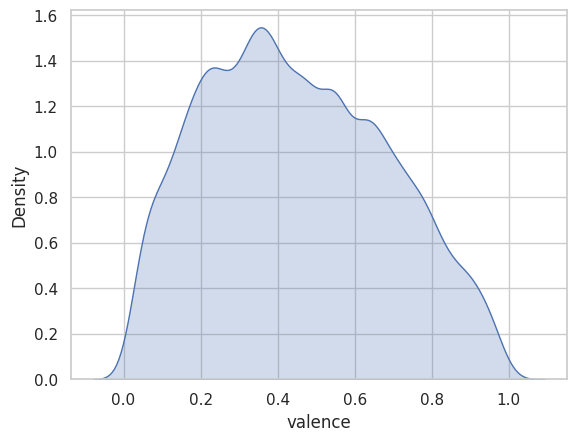

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['valence'], fill=True,)  # Create the KDE plot
plt.xlabel("valence")  # Set X-axis label
# plt.ylabel("Density")  # Set Y-axis label
# plt.title("Kernel Density Plot")  # Set plot title
plt.show()  # Display the plot

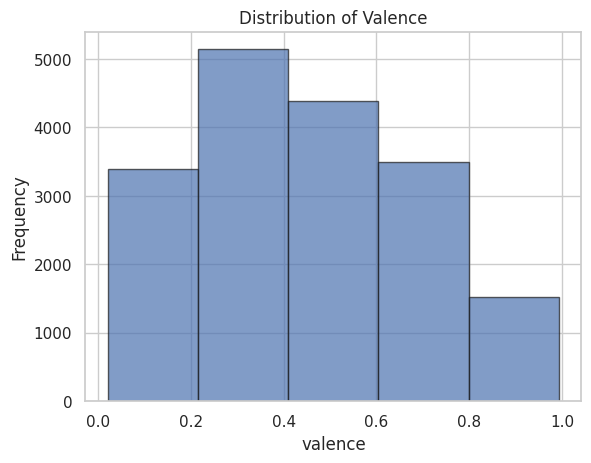

In [ ]:
plt.hist(spotify['valence'], bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('valence')
plt.ylabel('Frequency')
plt.title('Distribution of Valence')
plt.grid(True)
plt.show()

The plots above shows that it's apparent that the mode of valence values falls within the range of 0.2 to 0.4. Given that the valence metric spans from 0.0 to 1.0, it's noteworthy that 1.0 registers the lowest frequency as the mode. In simpler terms, the presence of very positive or highly joyful songs (with valence ranging from 0.8 to 1.0) is relatively scarce within the dataset. This suggests that songs characterized by extreme happiness or positivity are less prevalent compared to those with valence scores in the mid-range, indicating a diversity of emotional tones among the songs in the collection, with fewer at the highest end of positivity.

**Happy or sad songs can be categorized by variance but what factor can lead to valence or Positiveness ❓**

### Instrumentalness 🎹

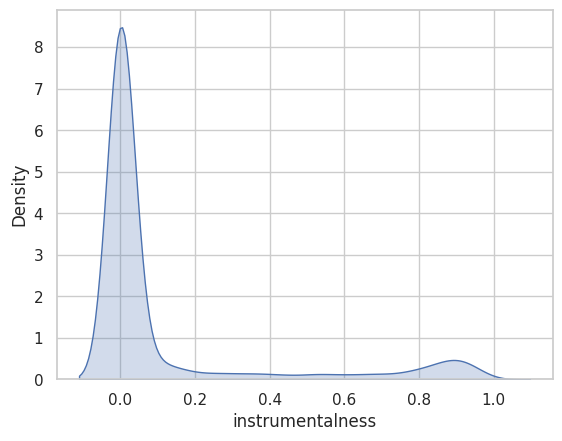

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['instrumentalness'], fill=True,)  # Create the KDE plot
plt.xlabel("instrumentalness")  # Set X-axis label
# plt.ylabel("Density")  # Set Y-axis label
# plt.title("Kernel Density Plot")  # Set plot title
plt.show()  # Display the plot

Examining the depicted graph, it becomes evident that the modal value surpasses 10. This observation points to diminished variability, primarily attributed to the plot's narrow section. Such a trend signifies a more concentrated distribution of data points, implying that values are clustered closer to the modal value, thus reducing the spread of data across the graph. This reduction in variability can be indicative of a more focused or consistent pattern within the dataset, where data points tend to hover around the central mode, as opposed to a wider dispersion that would suggest greater diversity or fluctuation in the values being measured or analyzed.

### acousticness 🎸

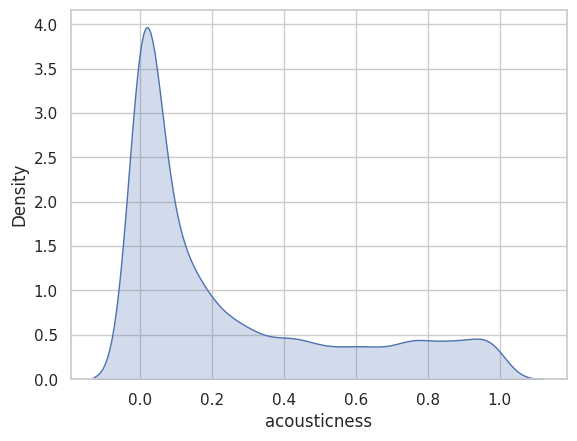

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(spotify['acousticness'], fill=True,)  # Create the KDE plot
plt.xlabel("acousticness")  # Set X-axis label
# plt.ylabel("Density")  # Set Y-axis label
# plt.title("Kernel Density Plot")  # Set plot title
plt.show()  # Display the plot

The plot conveys that the modal value is situated within the acousticness range of 0.0 to 0.2. This observation implies that a notable concentration of data points is clustered within this specific interval. The modal value, being the most frequently occurring value in the dataset, signifies a central tendency of the acousticness values. The data distribution's propensity to center around this range suggests that a significant portion of the observations exhibit acousticness levels falling within this narrow span. This insight aids in characterizing the predominant acoustic qualities of the dataset, indicating a prevalent trend towards lower acousticness values within the 0.0 to 0.2 range.

Univariant Analysis and Visualization done 👍

Univariant visualization and analysis has been carried out on each variable in the dataset inorder to understand the distribution across the dataset.



### Data insights:
The Main goal of this part of analysis is to visualize and look for which variable or feauture would be a good alternative to the factors of Danceability. These factors include
 * Tempo
 * Rhythm Stability
 * Beat strentgh
 * Regularity

Unfortunately these are not present in the dataset provided. Some Variables will be chosen inorder to choose the most suitable inorder to train our model
Variables that have been analyzed above include;
 * danceability
 * energy
 * loudness
 * tempo
 * instrumentalness
 * valence  
 * acousticness

# Key Relationships and insights in data
---

### Correlation

In [ ]:
#Delete categorical variables
columns_to_delete = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']
spotify_corr = spotify.drop(columns_to_delete, axis=1)

In [ ]:
spotify_corr #display correlation

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73.0,230666.0,0.676,0.461,1.0,-6.746,0.0,0.1430,0.032200,0.000001,0.358,0.715,87.917,4.0
1,55.0,149610.0,0.420,0.166,1.0,-17.235,1.0,0.0763,0.924000,0.000006,0.101,0.267,77.489,4.0
5,58.0,214240.0,0.688,0.481,6.0,-8.807,1.0,0.1050,0.289000,0.000000,0.189,0.666,98.017,4.0
12,52.0,198712.0,0.489,0.314,7.0,-9.245,0.0,0.0331,0.749000,0.000000,0.113,0.607,124.234,4.0
13,62.0,248448.0,0.691,0.234,3.0,-6.441,1.0,0.0285,0.777000,0.000000,0.120,0.209,87.103,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65971,70.0,196170.0,0.568,0.809,11.0,-3.869,0.0,0.0517,0.000253,0.000033,0.151,0.709,155.029,4.0
66000,43.0,42466.0,0.711,0.630,0.0,-6.591,1.0,0.2380,0.451000,0.000009,0.129,0.851,119.027,4.0
66005,49.0,140546.0,0.847,0.801,3.0,-4.073,1.0,0.1050,0.278000,0.000000,0.326,0.709,109.965,4.0
66006,46.0,147133.0,0.587,0.957,7.0,-4.098,1.0,0.0292,0.099100,0.033700,0.911,0.963,108.453,4.0


In [ ]:
spotify_corr.corr() #correlation matrix

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.044384,0.005941,0.054754,-0.004213,0.121118,-0.013823,-0.007603,-0.064785,-0.068606,0.008638,-0.083873,0.056626,0.013984
duration_ms,0.044384,1.000000,-0.179780,0.030017,-0.011422,0.001542,0.020983,-0.073635,-0.050191,0.063163,0.042984,-0.167642,0.058947,-0.031043
danceability,0.005941,-0.179780,1.000000,0.116690,0.033351,0.218117,-0.108400,0.116392,-0.151864,-0.178045,-0.093212,0.438938,-0.144024,0.175481
energy,0.054754,0.030017,0.116690,1.000000,0.041913,0.790121,-0.113291,0.198561,-0.781886,-0.204008,0.161830,0.214058,0.237846,0.178014
key,-0.004213,-0.011422,0.033351,0.041913,1.000000,0.050729,-0.129146,0.018157,-0.035326,-0.005384,0.012387,0.056519,0.015298,0.027184
loudness,0.121118,0.001542,0.218117,0.790121,0.050729,1.000000,-0.059857,0.146185,-0.661652,-0.438546,0.104072,0.191528,0.169190,0.185424
mode,-0.013823,0.020983,-0.108400,-0.113291,-0.129146,-0.059857,1.000000,-0.077065,0.121846,-0.039250,-0.006787,-0.002057,-0.014028,-0.031087
speechiness,-0.007603,-0.073635,0.116392,0.198561,0.018157,0.146185,-0.077065,1.000000,-0.113147,-0.062495,0.079122,0.047752,0.061283,0.060840
acousticness,-0.064785,-0.050191,-0.151864,-0.781886,-0.035326,-0.661652,0.121846,-0.113147,1.000000,0.193563,-0.086215,-0.117195,-0.208473,-0.190041
instrumentalness,-0.068606,0.063163,-0.178045,-0.204008,-0.005384,-0.438546,-0.039250,-0.062495,0.193563,1.000000,-0.059180,-0.245616,-0.029797,-0.094925


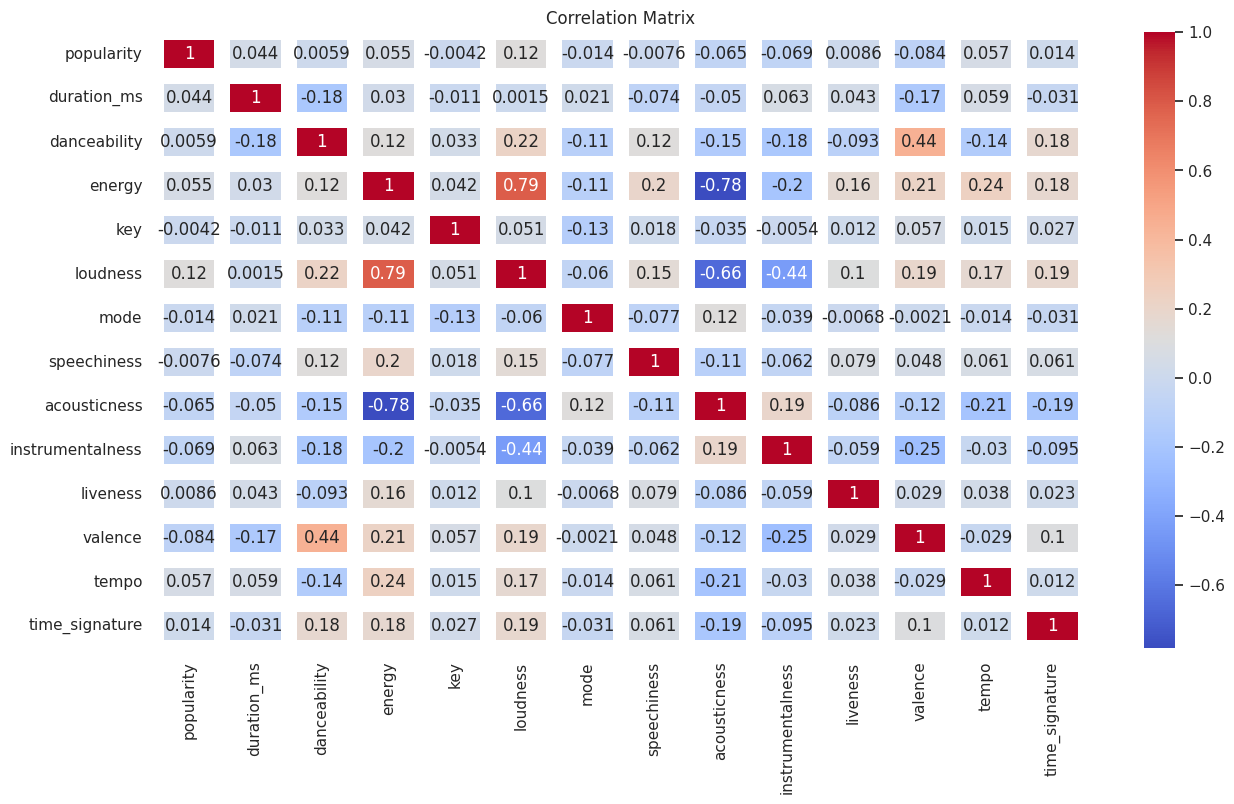

In [ ]:
spotify_corr.corr()
plt.figure(figsize=(15,8))
sns.heatmap(spotify_corr.corr(), annot=True,linewidths=10.2, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### From the Correlation  Matrix

In this analysis, three key relationships stand out:

1. **Strong Positive Correlation between Energy and Loudness**

The correlation matrix has unveiled a robust positive correlation between energy and loudness. This means that when one of these variables increases, the other tends to increase as well. To understand this correlation better, let's delve into what these variables represent in the context of your dataset.

**Energy**:A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy. In the context of music analysis, energy typically refers to the intensity, activity, or "power" of a song. High-energy songs are usually characterized by loud instruments, strong beats, and an overall sense of excitement. On the other hand, low-energy songs are often quieter, more subdued, and less dynamic.

**Loudness**: Loudness, measured in decibels (dB), quantifies the volume or amplitude of a song. Higher loudness values indicate louder tracks, while lower values indicate quieter ones.

The strong positive correlation we suggest that songs with higher energy levels are likely to be louder, and conversely, quieter songs are associated with lower energy levels. This finding aligns with our intuitive understanding of music—a high-energy rock anthem is typically louder than a mellow acoustic ballad.

2. **Negative Relationship between Energy and Acousticness**

Another noteworthy finding from your correlation analysis is the negative relationship between energy and acousticness. This suggests that as one of these variables increases, the other tends to decrease, and vice versa.

**Acousticness**: Acousticness measures the extent to which a song features acoustic (non-electronic) instruments. A high acousticness value indicates a predominantly acoustic or unplugged sound, while a low value suggests a more electronic or synthesized sound.

The negative correlation here implies that songs with high energy levels are less likely to be acoustic, and songs with low energy levels are more likely to have an acoustic character. This observation aligns with genre conventions in music. High-energy genres like rock, electronic, and pop tend to be less acoustic, featuring amplified instruments and electronic elements. In contrast, acoustic genres like folk and classical are often characterized by lower energy levels and a preference for acoustic instruments.

Understanding this relationship can be valuable for music genre classification, as well as for artists and producers aiming to achieve a specific sonic aesthetic in their music. It also has implications for playlist generation, helping curators create playlists with a consistent energy or acoustic vibe.

3. Valence: The Variable with the Closest Relationship

While energy and loudness exhibit strong correlations with each other and with other variables, valence emerges as a variable with a particularly close relationship in your analysis.

**Valence:** Valence measures the emotional positivity or happiness conveyed by a song. High valence values suggest a positive, cheerful mood, while low values indicate a more negative or melancholic mood.

The correlation between valence and the other variables in your dataset can provide valuable insights into the emotional and tonal characteristics of the songs. Let's explore this relationship in more detail.

Valence and Energy: A positive correlation between valence and energy suggests that songs with a more positive emotional tone tend to have higher energy levels. This makes intuitive sense—upbeat and joyful songs often feature energetic instrumentations and rhythms, while melancholic songs may lean towards lower energy levels.

Valence and Loudness: Similarly, a positive correlation between valence and loudness indicates that songs with a positive emotional tone tend to be louder. This aligns with the idea that high-energy and happy songs often feature bold, dynamic arrangements that are naturally louder.

Valence and Acousticness: The relationship between valence and acousticness can also be insightful. A negative correlation implies that more positive or joyful songs are less likely to be acoustic and may lean towards electronic or amplified instrumentations.

Understanding these relationships can be valuable for various purposes. Music recommendation systems, for instance, can use valence as an additional parameter to suggest songs that match a user's emotional preferences. Artists and music producers can use this information to craft songs that convey specific emotional tones through their musical choices, such as energy level, instrumentation, and volume.

# Energy Vs Loudness

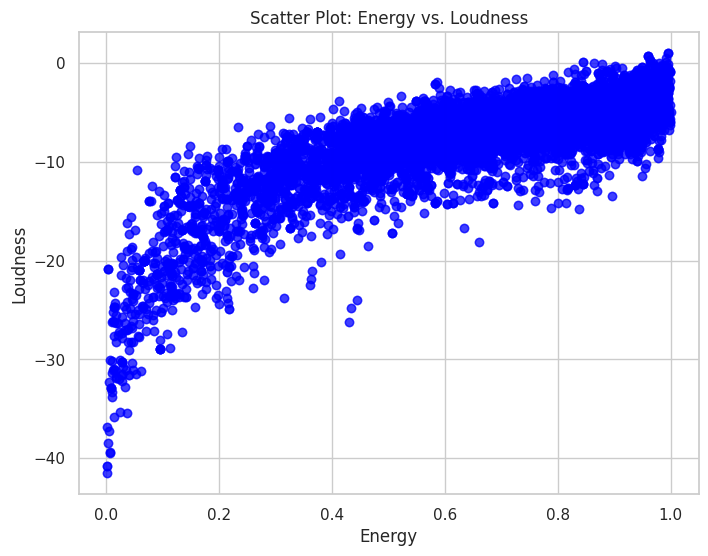

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(spotify['energy'], spotify['loudness'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Scatter Plot: Energy vs. Loudness')

# Show the plot
plt.grid(True)  # Add a grid (optional)
plt.show()

From the above we can see that
Each data point on the plot is represented by a blue circle marker (o).
The position of each circle on the plot corresponds to a specific combination of "Energy" and "Loudness."
The transparency (alpha) of the circles has been set to 0.5, allowing for better visualization when multiple data points overlap. and we can see that there is strong relation between loudness and energy in the dataset

# Energy Vs Acousticness

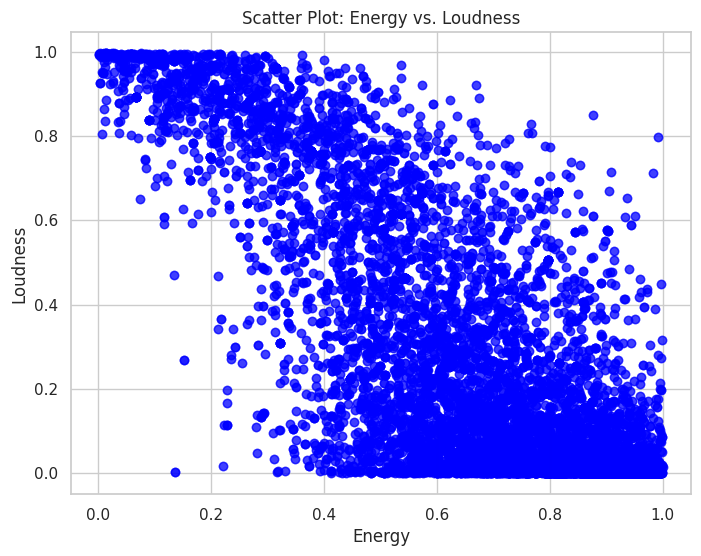

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(spotify['energy'], spotify['acousticness'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Scatter Plot: Energy vs. Loudness')

# Show the plot
plt.grid(True)  # Add a grid (optional)
plt.show()

From our above analysis we've been able to see that the best variables to use for bulding our machine learning  model to presict a songs danceability will be energy, loudness and valence. All these will be used to predict and recommend the playlist

# Machine Learning

we will be making use of loudness and energy as our feautures and danceability as our target variable which we are trying to preict.

In [ ]:
# we select our relevant features from our dataset as well as our target variable
audio_features = ['loudness', 'energy']

X = spotify[audio_features ]

y = spotify['danceability']

In [ ]:
# We Create a DataFrame to store track names
track_names = spotify['track_name']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🏋️‍♀️ Building our model

In [ ]:
# Train our linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

**Training our model**

In [ ]:
# Make predictions on the test set
pred1 = lr.predict(X_test)

pred2=svr.predict(X_test)

pred3=dtr.predict(X_test)

pred4=rfg.predict(X_test)

pred5=gbr.predict(X_test)

Evaluating the model by MSE and R-square metrics

In [ ]:
print(f'Evaluation of LR')
print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared (R2): {r1}")

Evaluation of LR
Mean Squared Error (MSE): 0.024712085590465768
R-squared (R2): 0.047535654619971


In [ ]:
print(f'Evaluation of SVR')
print(f"Mean Squared Error (MSE): {mse2}")
print(f"R-squared (R2): {r2}")

Evaluation of SVR
Mean Squared Error (MSE): 0.023189947828296552
R-squared (R2): 0.10620257457358562


In [ ]:
print(f'Evaluation of DTR')
print(f"Mean Squared Error (MSE): {mse3}")
print(f"R-squared (R2): {r3}")

Evaluation of DTR
Mean Squared Error (MSE): 0.006365862530570849
R-squared (R2): 0.7546440560120633


In [ ]:
print(f'Evaluation of RFG')
print(f"Mean Squared Error (MSE): {mse4}")
print(f"R-squared (R2): {r4}")

Evaluation of RFG
Mean Squared Error (MSE): 0.006130239162766969
R-squared (R2): 0.763725558095325


In [ ]:
print(f'Evaluation of GBR')
print(f"Mean Squared Error (MSE): {mse5}")
print(f"R-squared (R2): {r5}")

Evaluation of GBR
Mean Squared Error (MSE): 0.020877317635154782
R-squared (R2): 0.1953370102307157


Let's visualize the respective models and their metrics(MSE and R-square to better view which is better, remembering that the one with the lowest MSE and higher R-square value will be considered best for use

In [ ]:
data={'Models':['LR','SVR','DTR','RFG','GBR'],
      'MSE':[mse1,mse2,mse3,mse4,mse5],
      'R_sq':[r1,r2,r3,r4,r5]
      }

In [ ]:
pd.DataFrame(data)

,Models,MSE,R_sq
0,LR,0.024712,0.047536
1,SVR,0.023190,0.106203
2,DTR,0.006366,0.754644
3,RFG,0.006130,0.763726
4,GBR,0.020877,0.195337


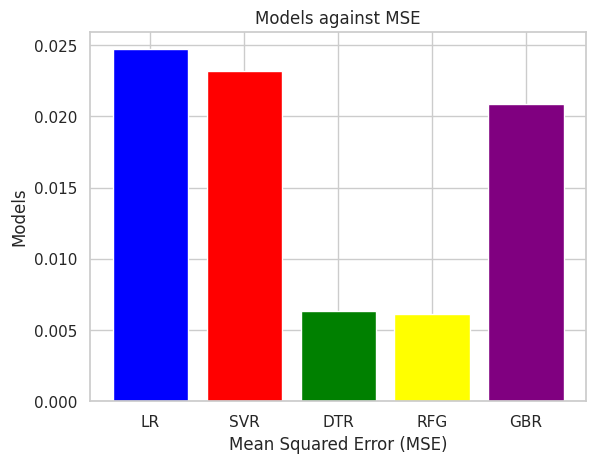

In [ ]:
plt.title('Models against MSE')
plt.bar(data['Models'],data['MSE'],color=['blue','red','green','yellow','purple'])
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel("Models")
plt.show()

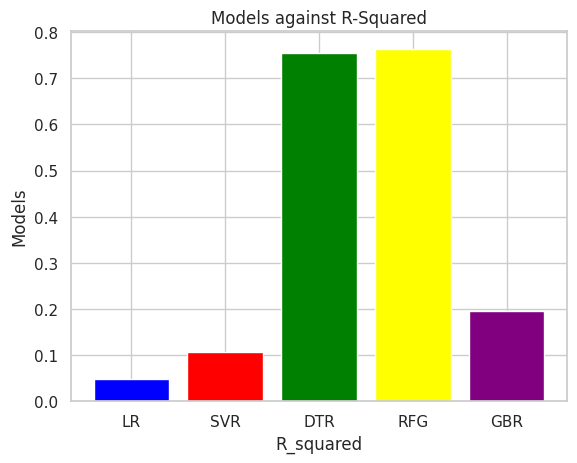

In [ ]:
plt.title('Models against R-Squared')
plt.bar(data['Models'],data['R_sq'],color=['blue','red','green','yellow','purple'])
plt.xlabel('R_squared')
plt.ylabel("Models")
plt.show()

A higher R² value (closer to 1.0) indicates that a larger proportion of the variance in the target variable is explained by the model and Random Forest Regressor's R-square value is higher. Also, Lower MSE values indicate that the model's predictions are closer to the actual values. A low MSE of 0.0061 for thte Random Forest Regressor indicates that this model provides more accurate predictions in terms of minimizing the squared errors.

Based on these metrics alone, the Random Forest Regressor appears to be the more suitable model for this data. It has a significantly lower MSE, and higher R-square value suggesting that it provides better predictions, which is a practical measure of model performance.

**Now we are use our trained model to make predictions**

In [ ]:
# Using the trained model to make predictions for new songs
# For example, you can predict danceability for a new song with loudness=-5 and energy=0.8
new_audio_features = np.array([[-5, 0.8]])
predicted_danceability = rfg.predict(new_audio_features)


In [ ]:
print(f"Predicted Danceability for the new song: {predicted_danceability[0]}")

Predicted Danceability for the new song: 0.5730300000000002


In [ ]:
#Ouput of trained model
predicted_danceability

array([0.57303])

**Our Curated playlist** 💽

In [ ]:
spotify[spotify['danceability'] > 0.59].head(50)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.0,214240.0,False,0.688,0.4810,6.0,-8.807,1.0,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4.0,acoustic
13,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62.0,248448.0,False,0.691,0.2340,3.0,-6.441,1.0,0.0285,0.7770,0.000000,0.1200,0.209,87.103,4.0,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56.0,129750.0,False,0.706,0.1120,2.0,-18.098,1.0,0.0391,0.8270,0.000004,0.1250,0.414,110.154,4.0,acoustic
17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54.0,169728.0,False,0.795,0.0841,10.0,-18.090,0.0,0.0461,0.7420,0.000012,0.0853,0.609,91.803,4.0,acoustic
38,1ae8XfBQ3fDEvmBjFaemGV,Brandi Carlile,Coffee Moment,This Time Tomorrow,0.0,206267.0,False,0.606,0.3260,10.0,-10.031,1.0,0.0294,0.8410,0.000000,0.1390,0.414,91.626,4.0,acoustic
50,72xTsTouZ5nBmASX8k1XCW,Highland Peak,Trampoline (Acoustic),Trampoline - Acoustic,46.0,213098.0,False,0.596,0.2000,0.0,-10.424,0.0,0.0305,0.9100,0.000183,0.0884,0.308,107.893,4.0,acoustic
66,6VwAh8Z1d5YKoSWoEaV4db,Aaron Espe,Making All Things New,Making All Things New,65.0,159600.0,False,0.787,0.3550,0.0,-11.429,1.0,0.0288,0.8960,0.020100,0.1110,0.480,99.978,4.0,acoustic
73,2E9viCx0hJKNKNThd2MdGQ,Bailey Jehl,You're Still The One,You're Still The One,56.0,177500.0,False,0.607,0.4730,2.0,-8.555,1.0,0.0340,0.7120,0.000000,0.6600,0.540,119.698,4.0,acoustic
78,11TK5KLtLZUdKr1C549bAw,Drew Holcomb & The Neighbors,Good Light,What Would I Do Without You,64.0,172213.0,False,0.602,0.3360,8.0,-11.106,1.0,0.0369,0.8830,0.001700,0.1430,0.335,90.894,4.0,acoustic


From the above here is the top50 songs predicted by our model